In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_x=pd.read_csv("../Downloads/Linear_X_Train.csv")   # collecting values of x and y into dataframe
df_y=pd.read_csv("../Downloads/Linear_Y_Train.csv")
x=df_x.values
y=df_y.values
print(x)
x = x.reshape((-1,))
y = y.reshape((-1,))
x=(x-x.mean())/x.std()  # feature scalling
print(x.shape)
#plt.scatter(x,y)
#plt.show()



[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]]
(3750,)


In [3]:
#hypothesis
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [4]:
#error function
def error(x,y,theta):
    e=0.0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],theta)
        e+=(hx-y[i])*(hx-y[i])
    #print(e)    
    return e    

In [5]:
#gredient
def gredient(x,y,theta):
    grad=np.array([0.0,0.0])
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],theta)
        grad[0]=grad[0]+(hx-y[i])
        grad[1]=grad[1]+(hx-y[i])*x[i] 
   # print(grad)    
    return grad

In [6]:
#gredient descent
def GradientDescent(x,y,learning_rate=.0001):
    theta=np.array([0.7,0.5])
    err_arr=[]
    theta_arr=[]
    max_itr=100
    for i in range(max_itr):
        g=gredient(x,y,theta)
        e=error(x,y,theta)
        theta_arr.append([theta[0],theta[1]])
        err_arr=np.append(err_arr,[e])
        theta[0]=theta[0]-learning_rate*(g[0]) 
        theta[1]=theta[1]-learning_rate*(g[1])
    #print(theta)
   # print(err_arr)
    #print(theta_arr)
    return theta,err_arr,theta_arr   

In [7]:
theta, error_list,theta_list = GradientDescent(x,y)   

In [8]:
print(theta)

[ 0.68386897 79.90573694]


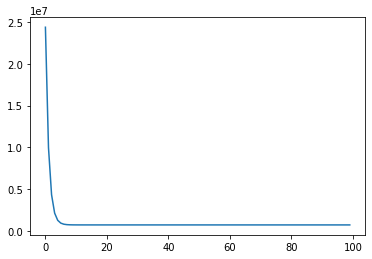

In [9]:
plt.plot(error_list)
#plt.xlim([0,1000])
#plt.ylim([0,1000])
plt.show()

0.6838689680155888 79.90573694249977


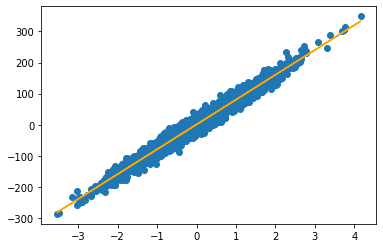

In [10]:

plt.scatter(x,y)
print(theta[0],theta[1])
plt.plot(x,hypothesis(x,theta),color='orange')
#plt.show()

In [20]:
df_t=pd.read_csv("../Downloads/Linear_X_Test.csv")
t=df_t.values
output=[]
for i in range(t.shape[0]):
    output.append((theta[0]+theta[1]*t[i]))
print(output[0:5])

AttributeError: 'numpy.ndarray' object has no attribute 'append'

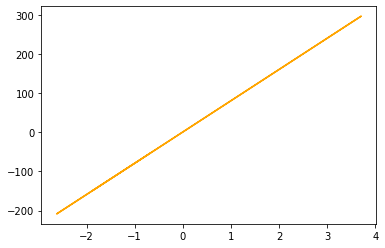

In [17]:
plt.plot(t,output,color='orange')
plt.show()

In [21]:
df_t.to_csv('SmartWatch.cv')